In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, time, math, random
import seaborn as sns

### Downloading data...

#### **Sources**:
- [World Inequality Database on Education (WIDE)](https://www.education-inequalities.org/)
![](http://www.oecd.org/media/oecdorg/satellitesites/pisa/New%20web%20banner_1.png)
- [OECD's Programme for International Student Assessment (PISA) Database](http://www.oecd.org/pisa/) 
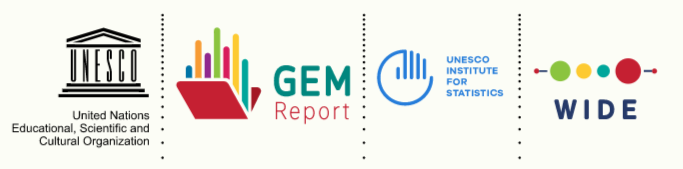

In [ ]:
# Commenting out unnecessary inputs...

    
### Data inputs:
## World Inequality Database on Education (WIDE): WIDE_2019-01-23.csv; Description: WIDE_metadata_2019-01-22.csv
!wget https://us-east-1-unesco-wide.s3.amazonaws.com/WIDE_2019-01-23.csv -q --show-progress
!wget https://us-east-1-unesco-wide.s3.amazonaws.com/WIDE_metadata_2019-01-22.csv -q --show-progress
    
### NOT USED-------------------------------
# Digital agenda scorecard: digital-agenda-scoreboard-key-indicators.csv

"""!wget https://digital-agenda-data.eu/download/digital-agenda-scoreboard-key-indicators.csv.zip
#!unzip digital-agenda-scoreboard-key-indicators.csv.zip"""

# Global education statistics: ../input/global-education-statistics

## WIDE (World Inequality Database on Education)

[Data Description](https://us-east-1-unesco-wide.s3.amazonaws.com/About%20WIDE.pdf)

In [ ]:
import pandas as pd
# Database includes differences in reading, math, and science levels for each wealth, sex, and ethnic demographic in every nation.
pd.read_csv('WIDE_2019-01-23.csv')
# Notice the myriad missing values; analysis code later will automatically select rows without empty values.

In [ ]:
WIDE = pd.read_csv('WIDE_2019-01-23.csv')
print("Num_vals_total:", len(WIDE))
print("Differences:\n",set(WIDE['category']))

In [ ]:
# Hyperparams
import scipy
from scipy import stats
wide = WIDE.copy()
YEAR = 2015
EXPLORED_DIFFERENCE = 'Wealth'
wide = wide[wide['year'] == YEAR]
wide = wide[wide['category'] == EXPLORED_DIFFERENCE]
print("Number of distinct groups analyzed: ",len(wide))
nations = set(wide['country'])

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

nation_inequalities = {}
for nation in nations:
    #print(nation)
    subset_wide = wide[wide['country'] == nation].copy()
    divisions = [subset_wide[subset_wide['survey'] == survey] for survey in set(subset_wide['survey'])]
    #if nation == 'Colombia':
        #break
        #print([survey for survey in subset_wide['survey']])
    gross_inequality = []
    for division in divisions:
        #scipy.stats.variation()
        n_subset_wide = division.dropna(axis=1).select_dtypes(exclude='object').drop(['year'],axis=1)
        if len(n_subset_wide.columns) > 0:
            for indicator in n_subset_wide:
                if pd.isnull(scipy.stats.variation(n_subset_wide[indicator])): # drop Nan values
                    continue
                
                # PICK ONLY MEAN ACADEMIC SCORE INDICATORS!
                if "_m" in indicator: 
                    gross_inequality.append(scipy.stats.variation(n_subset_wide[indicator]))
            #print("Gross Inequality: ",gross_inequality)
    if len(gross_inequality) > 0: gross_inequality = np.mean(gross_inequality)
    #print(gross_inequality)
    nation_inequalities[nation] = gross_inequality

In [ ]:
sorted_nation_inequalities = {k: v for k, v in sorted(nation_inequalities.items(), key=lambda item: item[1], reverse=True)}
inverse_sorted_nation_inequalities = {k: v for k, v in sorted(nation_inequalities.items(), key=lambda item: item[1])}
sorted_nation_inequalities

In [ ]:
x, y = list(inverse_sorted_nation_inequalities.keys()), list(inverse_sorted_nation_inequalities.values())
fig, ax = plt.subplots(figsize=(10,15))
plt.title("Gross Inequality By Nation -- Which countries are most equal? (Inequality by Wealth)\n (Smaller values = Less Inequality)")
plt.ylabel("Nation")
plt.xlabel("Gross Inequality Index")
sns.barplot(x=y,y=x, ax=ax, orient='h')
plt.savefig('gross_inequality_by_nation.png', dpi=800)
plt.show()

![](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Flag_of_the_Dominican_Republic.svg/255px-Flag_of_the_Dominican_Republic.svg.png)
### Case Study:
1. The Dominican Republic, found to have the most educational inequality by wealth of any nation.
>     - What makes it so unequal?
>         - It seems that low educational quality overall is linked to high educational inequality. 
>         - In places where most schools are inadequate, the rich can afford to send their children to decent programs, while the poor cannot.

In [ ]:
import scipy
wide = WIDE.copy()
YEAR = 2015
EXPLORED_DIFFERENCE = 'Wealth'
nation_to_explore = 'Dominican Rep.'
wide = wide[wide['year'] == YEAR]
wide = wide[wide['category'] == EXPLORED_DIFFERENCE]
wide = wide[wide['country'] == nation_to_explore]
#scipy.stats.variation()
wide = wide[wide['survey'] == 'PISA']
wide.dropna(axis=1)
gross_inequality = []
subset_wide =  wide.dropna(axis=1).select_dtypes(exclude='object').drop(['year'],axis=1)
for indicator in subset_wide:
    if pd.isnull(scipy.stats.variation(subset_wide[indicator])): 
        #print(scipy.stats.variation(subset_wide[indicator]).dtype)
        continue
    if "_m" in indicator:
        #print(indicator, scipy.stats.variation(subset_wide[indicator]))
        gross_inequality.append(scipy.stats.variation(subset_wide[indicator]))
        #print(wide['Wealth'],subset_wide[indicator])
        splot = sns.barplot(x=[1,2,3,4,5],y=subset_wide[indicator])
        plt.title("Dominican Republic Student performance on "+indicator+" by income quintile.")
        plt.xlabel('Quintile'); plt.ylabel('Percentage reaching standard.')
        for p in splot.patches: # Annotate bars
            splot.annotate(format(p.get_height(), '.3f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', va = 'center', 
                           xytext = (0, 9), 
                           textcoords = 'offset points')
        plt.show()
#print(scipy.stats.variation(subset_wide[indicator]))
if len(gross_inequality) > 0:
    gross_inequality = np.mean(gross_inequality)
print("Gross Inequality:",gross_inequality)

![](https://upload.wikimedia.org/wikipedia/commons/thumb/6/63/Flag_of_Macau.svg/255px-Flag_of_Macau.svg.png)
### Case Study:

2. Macao, China, found to have the most educational equality by wealth of any nation.
>         - It seems that individuals perform well regardless of their wealth bracket. This points to an egalitarian education system that provides a high bottom line for even the worst-off learners.
>         - The fact that most parents send their children to private schools in Macao probably means that quality education's relatively affordable there.

In [ ]:
import scipy
wide = WIDE.copy()
YEAR = 2015
EXPLORED_DIFFERENCE = 'Wealth'
nation_to_explore = 'Macao, China'
wide = wide[wide['year'] == YEAR]
wide = wide[wide['category'] == EXPLORED_DIFFERENCE]
wide = wide[wide['country'] == nation_to_explore]
#scipy.stats.variation()
wide = wide[wide['survey'] == 'PISA']
wide.dropna(axis=1)
gross_inequality = []
subset_wide =  wide.dropna(axis=1).select_dtypes(exclude='object').drop(['year'],axis=1)
for indicator in subset_wide:
    if pd.isnull(scipy.stats.variation(subset_wide[indicator])): 
        #print(scipy.stats.variation(subset_wide[indicator]).dtype)
        continue
    if "_m" in indicator:
        gross_inequality.append(scipy.stats.variation(subset_wide[indicator]))
        splot = sns.barplot(x=[1,2,3,4,5],y=subset_wide[indicator])
        plt.title("Macao Student performance on "+indicator+" by income quintile.")
        plt.xlabel('Quintile'); plt.ylabel('Percentage reaching standard.')
        for p in splot.patches: # Annotate bars
            splot.annotate(format(p.get_height(), '.3f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', va = 'center', 
                           xytext = (0, 9), 
                           textcoords = 'offset points')
        plt.savefig("Macao_Student_performance_on_"+indicator+"_by_income_quintile.png", dpi=800)
        plt.show()
#print(scipy.stats.variation(subset_wide[indicator]))
if len(gross_inequality) > 0:
    gross_inequality = np.mean(gross_inequality)
print(gross_inequality)

In [ ]:
import scipy
wide = WIDE.copy()
YEAR = 2015
EXPLORED_DIFFERENCE = 'Wealth'
nation_to_explore = 'United States'
wide = wide[wide['year'] == YEAR]
wide = wide[wide['category'] == EXPLORED_DIFFERENCE]
wide = wide[wide['country'] == nation_to_explore]
#scipy.stats.variation()
wide = wide[wide['survey'] == 'PISA']
wide.dropna(axis=1)
gross_inequality = []
subset_wide =  wide.dropna(axis=1).select_dtypes(exclude='object').drop(['year'],axis=1)
for indicator in subset_wide:
    if pd.isnull(scipy.stats.variation(subset_wide[indicator])): 
        #print(scipy.stats.variation(subset_wide[indicator]).dtype)
        continue
    if "_m" in indicator:
        print(indicator, scipy.stats.variation(subset_wide[indicator]))
        gross_inequality.append(scipy.stats.variation(subset_wide[indicator]))
        print(wide['Wealth'],subset_wide[indicator])
        sns.scatterplot(x=[1,2,3,4,5],y=subset_wide[indicator]); plt.show()
#print(scipy.stats.variation(subset_wide[indicator]))
if len(gross_inequality) > 0:
    gross_inequality = np.mean(gross_inequality)
print(gross_inequality)

### Poor people fall in lower quintiles.

## PISA Data

Using linear regression to find the correlation between PISA indicators and the Gross Inequality Index (calculated by taking the mean of academic performance variances between wealth brackets.)

Note: We're looking at 2015 Educational statistics while using laptop availability scores from 2015. This is to maximize the amount of data we have.

PISA Indicators:
```Measures: PISA Reading Scale: Overall Reading, PISA Mathematics Scale: Overall Mathematics, PISA Science Scale: Overall Science, Attitudes towards computers: Limitations, Attitudes towards computers: Tool for learning, Index use of ICT at school in general, Count ICT: Availability at home, Count ICT: Availability at school, Student-computer ratio: Portable computers, Index ICT as a topic in Social Interaction, Student-computer ratio: Computers for teachers with internect connection```

In [ ]:
# Nations found in both WIDE and Pisa Datasets
# We can only analyze these nations because the data for other nations are incomplete.
common_nations = ['Slovenia',
 'Sweden',
 'Chile',
 'Iceland',
 'Estonia',
 'Poland',
 'New Zealand',
 'Spain',
 'Netherlands',
 'United States',
 'Greece',
 'France',
 'Belgium',
 'Luxembourg',
 'Lithuania',
 'Canada',
 'Finland',
 'Ireland',
 'Colombia',
 'Australia',
 'Italy',
 'Germany',
 'Israel',
 'Mexico',
 'Austria',
 'Portugal',
 'Latvia',
 'Japan',
 'Denmark',
 'Turkey',
 'Switzerland',
 'Norway',
 'Hungary']
print("Nations examined: ",len(common_nations))

### Finding correlations...

In [ ]:
#xl = pd.ExcelFile('../input/pisa02/IDEExcelExport-Jan102021-0340AM.xls')
xl = pd.ExcelFile('../input/pisa03/IDEExcelExport-Jan162021-0250AM.xls')
#xl = pd.ExcelFile('../input/pisa04/IDEExcelExport-Jan162021-0313AM.xls')
print(xl.sheet_names)  # see all sheet names
R_THRESHOLD = 0.0
VERBOSE = 0
DROP_THRESHOLD = 5

correlations_of_note = []
for sheet_name in xl.sheet_names:
    whole_dataset = xl.parse(sheet_name)  # read a specific sheet to DataFrame
    desc, year = whole_dataset.values[7,1], whole_dataset.values[11,1]
    print("",desc)
    col1, col2 = whole_dataset.values[10,3], whole_dataset.values[10,4]
    pisa = {}

    pisa[col1] = whole_dataset.values[11:, 3]
    pisa[col2] = whole_dataset.values[11:, 4]
    pisa = pd.DataFrame(pisa)
    pisa.index = whole_dataset.values[11:,2]
    pisa = pisa.loc[common_nations]
    
    num_dropped = 0
    for i in pisa.iloc:
        try: 
            float(i['Average'])
            float(i['Standard Error'])
        except: 
            if VERBOSE: print('Dropping %s because of invalid data...'%i.name)
            num_dropped += 1
            pisa.drop(i.name, inplace=True)
    if num_dropped > DROP_THRESHOLD: continue
        
    gross_inequalities, pisa_indicator = [],[]
    for nation in pisa.index:
        gross_inequalities.append(nation_inequalities[nation])
        pisa_indicator.append(pisa['Average'].loc[nation])
    
    try: slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(gross_inequalities, pisa_indicator)
    except: print(pisa_indicator)
    #print(r_value)
    # Storing strong correlations in correlations_of_note.
    if math.fabs(r_value) > R_THRESHOLD: correlations_of_note.append((gross_inequalities,pisa_indicator,desc, r_value, (slope, intercept)))

In [ ]:
# Print correlations
[print(corr[2], '\n',corr[3]) for corr in correlations_of_note]
pass

### Graphing correlations (showing regression & residual plots)

In [ ]:
# Visualizing correlations
import seaborn as sns
for gross_inequalities,pisa_indicator,desc, r_value, (slope, intercept) in correlations_of_note:
    print(desc)
    print("r-value:", round(r_value,3))
    print("Slope:",round(slope,3)); print("Intercept:",round(intercept,3))
    sns.set(style="darkgrid")
    g = sns.jointplot(x=pisa_indicator, y=gross_inequalities,
                      kind="reg", truncate=False,
                      color="m", height=7)
    plt.title("Linear Regression: GI Score vs PISA Indicator")
    plt.xlabel(desc)
    plt.ylabel("GI (Gross Inequality) Score")
    plt.savefig(desc+'_plot.png', dpi=800, bbox_inches="tight") # Save image as .png.
    plt.show()
    sns.residplot(x=pisa_indicator, y=gross_inequalities,color="m")
    plt.title("Residual plot: GI Score vs PISA Indicator")
    plt.xlabel(desc)
    plt.ylabel("GI (Gross Inequality) Score")
    plt.savefig(desc+'_residual.png', dpi=800, bbox_inches="tight")
    plt.show()

### Relating teacher participation index scores with other equity factors:

In [ ]:
# Reading data

teacher_participation = pd.ExcelFile('../input/pisa03/IDEExcelExport-Jan162021-0250AM.xls').sheet_names[8]

belonging = (pd.ExcelFile('../input/pisa04/IDEExcelExport-Jan162021-0313AM.xls'),pd.ExcelFile('../input/pisa04/IDEExcelExport-Jan162021-0313AM.xls').sheet_names[1])
school_size = (pd.ExcelFile('../input/pisa03/IDEExcelExport-Jan162021-0250AM.xls'),pd.ExcelFile('../input/pisa03/IDEExcelExport-Jan162021-0250AM.xls').sheet_names[2])
class_size = (pd.ExcelFile('../input/pisa03/IDEExcelExport-Jan162021-0250AM.xls'),pd.ExcelFile('../input/pisa03/IDEExcelExport-Jan162021-0250AM.xls').sheet_names[3])
special_needs_proportion = (pd.ExcelFile('../input/pisa03/IDEExcelExport-Jan162021-0250AM.xls'),pd.ExcelFile('../input/pisa03/IDEExcelExport-Jan162021-0250AM.xls').sheet_names[4])

correlations_of_note = []

other_factors = [belonging, school_size, class_size, special_needs_proportion]

teacher_ds = pd.ExcelFile('../input/pisa03/IDEExcelExport-Jan162021-0250AM.xls').parse(teacher_participation)  # read a specific sheet to DataFrame
desc, year = teacher_ds.values[7,1], teacher_ds.values[11,1]

col1, col2 = teacher_ds.values[10,3], teacher_ds.values[10,4]
teacher_pisa = {}

# Extracting data from excel dataframe:
teacher_pisa[col1] = teacher_ds.values[11:, 3]
teacher_pisa[col2] = teacher_ds.values[11:, 4]
teacher_pisa = pd.DataFrame(teacher_pisa)
teacher_pisa.index = teacher_ds.values[11:,2]
teacher_pisa = teacher_pisa.loc[common_nations]

# Drop malformed data
num_dropped = 0
for i in teacher_pisa.iloc:
    try: 
        float(i['Average'])
        float(i['Standard Error'])
    except: 
        if VERBOSE: print('Dropping %s because of invalid data...'%i.name)
        num_dropped += 1
        pisa.drop(i.name, inplace=True)
            
# Doing same steps as above but for all factors other than teacher participation:
for f in other_factors:
    sheet, factor = f[0],f[1]
    whole_ds = sheet.parse(factor) 
    desc, year = whole_ds.values[7,1], whole_ds.values[11,1]
    print("Parsing...",desc)
    col1, col2 = whole_ds.values[10,3], whole_ds.values[10,4]
    pisa = {}

    pisa[col1] = whole_ds.values[11:, 3]
    pisa[col2] = whole_ds.values[11:, 4]
    pisa = pd.DataFrame(pisa)
    pisa.index = whole_ds.values[11:,2]
    pisa = pisa.loc[common_nations]

    num_dropped = 0
    for i in pisa.iloc:
        try: 
            float(i['Average'])
            float(i['Standard Error'])
        except: 
            if VERBOSE: print('Dropping %s because of invalid data...'%i.name)
            num_dropped += 1
            pisa.drop(i.name, inplace=True)

    teacher_agency, pisa_indicator = [],[]
    for nation in pisa.index:
        teacher_agency.append(teacher_pisa['Average'].loc[nation])
        pisa_indicator.append(pisa['Average'].loc[nation])

    try: slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(teacher_agency, pisa_indicator)
    except: print("Error! ",pisa_indicator)
    #print(r_value)
    
    # Store data for all strong correlations in correlations_of_note
    if math.fabs(r_value) > R_THRESHOLD: correlations_of_note.append((teacher_agency,pisa_indicator,desc, r_value, (slope, intercept)))

In [ ]:
# Print pisa indicators and the r-value of their correlation w/ teacher agency
[print(corr[2], '\n',corr[3]) for corr in correlations_of_note]
pass

In [ ]:
# Visualizing the correlations between Teacher Participation & other educational factors

import seaborn as sns

# Fix for formatting super long axis titles
def nice_formatting(string):
    reformatted_string = []
    for index, word in enumerate(string.split(' ')):
        reformatted_string.append(word)
        if (index+1) % 8 == 0: reformatted_string.append('\n')
    return ' '.join(reformatted_string)
    
for teacher_agency,pisa_indicator,desc, r_value, (slope, intercept) in correlations_of_note:
    print(desc)
    print("r-value:", round(r_value,3))
    print("Slope:",round(slope,3)); print("Intercept:",round(intercept,3))
    sns.set(style="darkgrid")
    g = sns.jointplot(y=pisa_indicator, x=teacher_agency,
                      kind="reg", truncate=False,
                      color="m", height=7)
    plt.title("Teacher Participation (PISA) vs additional PISA Indicator")
    plt.ylabel(nice_formatting(desc))
    plt.xlabel("Teacher Participation Index")
    plt.savefig('teacher_participation_'+desc+'_plot.png', dpi=800, bbox_inches="tight")
    plt.show()
    sns.residplot(y=pisa_indicator, x=teacher_agency,color="m")
    plt.title("Residual Plot: Teacher Participation (PISA) vs additional PISA Indicator")
    plt.ylabel(nice_formatting(desc))
    plt.xlabel("Teacher Participation Index")
    plt.savefig('teacher_participation_'+desc+'_residual.png', dpi=800, bbox_inches="tight")
    plt.show()

### Auxiliary functions
Storing data...

In [ ]:
import pickle as pkl
fh = open("correlations_of_note.pkl", 'wb') 
pkl.dump(correlations_of_note, fh)

Loading stored data...

In [ ]:
import pickle as pkl
with open('correlations_of_note.pkl','rb') as fh:
    n_correlations_of_note = pkl.load(fh)